In [27]:
import pandas as pd

In [28]:
# CSV 파일 경로 
df = pd.read_csv("../data/leads_df_cleaned.csv")

# 데이터 확인
print(df.shape)

C:\Users\ha\AppData\Local\Temp\ipykernel_21460\717535690.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/leads_df_cleaned.csv")


(69646, 100)


In [29]:
#!pip install scikit-learn pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder



In [33]:

if 'Status_Text' in df.columns:
    print("✅ 'Status_Text' 열이 존재합니다.")
else:
    print("❌ 'Status_Text' 열이 없습니다.")

✅ 'Status_Text' 열이 존재합니다.


In [34]:
from sklearn.preprocessing import LabelEncoder

# 타겟이 범주형일 경우 숫자로 변환
df = df.dropna(subset=['Status_Text'])  # null 제거

le = LabelEncoder()
df['Status_Label'] = le.fit_transform(df['Status_Text'])


In [35]:
X = df.select_dtypes(include='number').drop(columns=['Status_Label'], errors='ignore')
y = df['Status_Label']


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

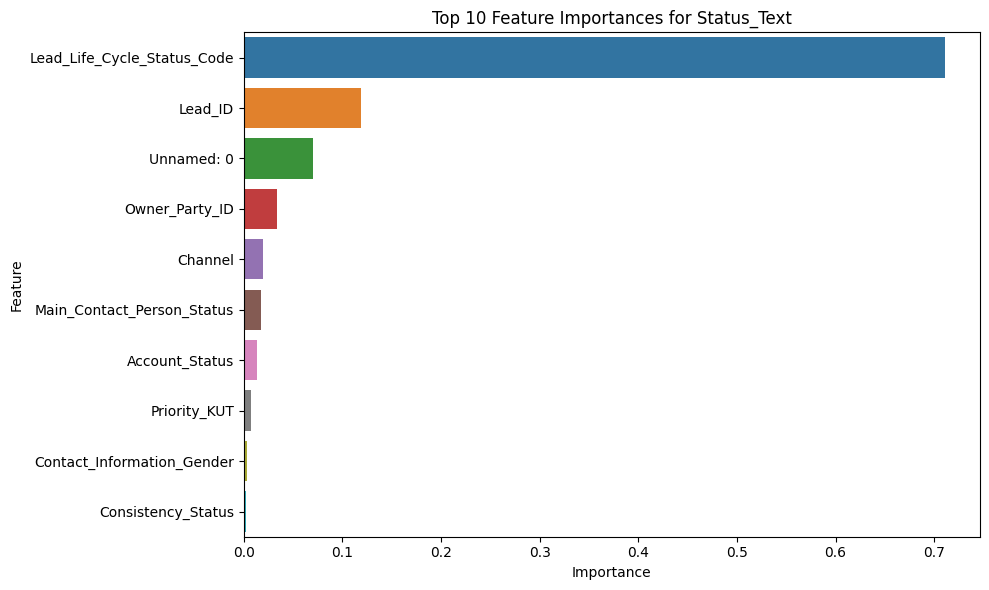

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 중요도 추출
importances = pd.Series(model.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances.values, y=top_importances.index)
plt.title("Top 10 Feature Importances for Status_Text")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Lead Life Cycle 제거 후 확인


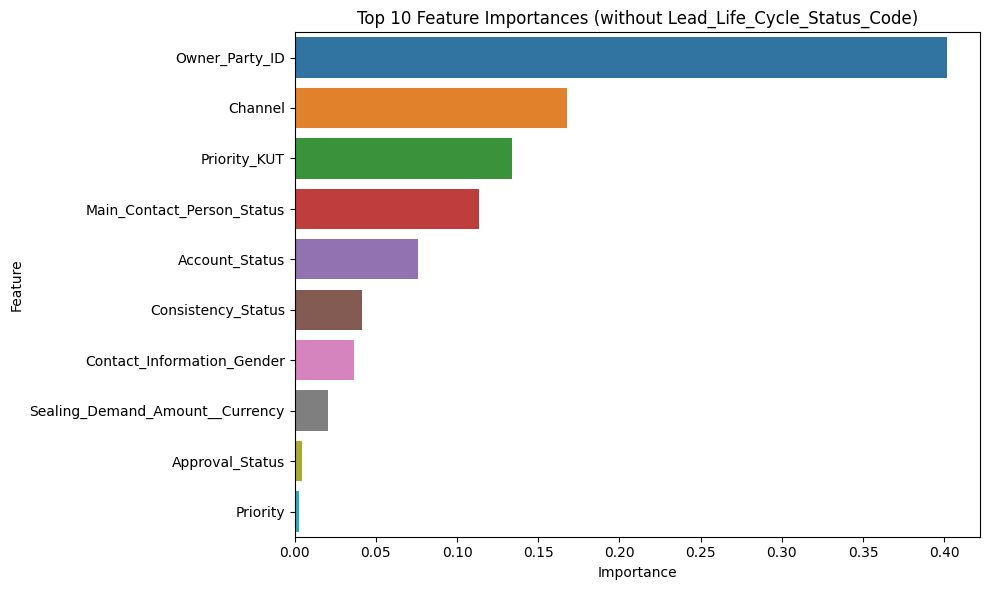

In [41]:

# 1. 복사 및 전처리
#df = df_cleaned.copy()
df = df.drop(columns=['Lead_ID', "Unnamed: 0"])

df = df.dropna(subset=['Status_Text'])

# 2. 타겟 인코딩
le = LabelEncoder()
df['Status_Label'] = le.fit_transform(df['Status_Text'])

# 3. 숫자형 feature만 추출 + Lead_Life_Cycle_Status_Code 제거
X = df.select_dtypes(include='number').drop(columns=['Status_Label', 'Lead_Life_Cycle_Status_Code'], errors='ignore')
y = df['Status_Label']

# 4. 학습용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. 중요도 추출
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# 7. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances (without Lead_Life_Cycle_Status_Code)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
